# Case Study 1: Customer Churn Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
# Loading Data Set
df=pd.read_csv("cleaned_churn_data.csv")

In [16]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   PhoneService      7043 non-null   object 
 3   Contract          7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   float64
 8   Churn             7043 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 495.3+ KB


(   customerID  tenure PhoneService        Contract PaperlessBilling  \
 0  7590-VHVEG       1           No  Month-to-month              Yes   
 1  5575-GNVDE      34          Yes        One year               No   
 2  3668-QPYBK       2          Yes  Month-to-month              Yes   
 3  7795-CFOCW      45           No        One year               No   
 4  9237-HQITU       2          Yes  Month-to-month              Yes   
 
                PaymentMethod  MonthlyCharges  TotalCharges Churn  
 0           Electronic check           29.85         29.85    No  
 1               Mailed check           56.95       1889.50    No  
 2               Mailed check           53.85        108.15   Yes  
 3  Bank transfer (automatic)           42.30       1840.75    No  
 4           Electronic check           70.70        151.65   Yes  ,
 None)

In [17]:
df.describe

<bound method NDFrame.describe of       customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0      

In [18]:
print(df.isnull().sum()) # In this datatype there is no missing value.

customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


# Change Data Types

In [19]:
# Converting datatype to categorical
categorical_columns = ["PhoneService", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
df[categorical_columns] = df[categorical_columns].astype("category")

In [20]:
df.dtypes

customerID            object
tenure                 int64
PhoneService        category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges         float64
Churn               category
dtype: object

In [23]:
# Check for missing values after conversion
print(df["TotalCharges"].isnull().sum())

0


In [22]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 customerID          0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [24]:
df['TotalCharges'].fillna(0, inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_9236\171940771.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


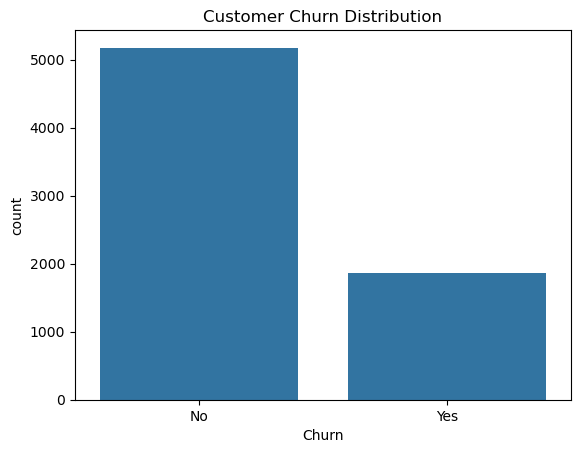

In [25]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

# Churn Distribution
sns.countplot(x="Churn", data=df)
plt.title("Customer Churn Distribution")
plt.show()

# Churn vs. Monthly Charges

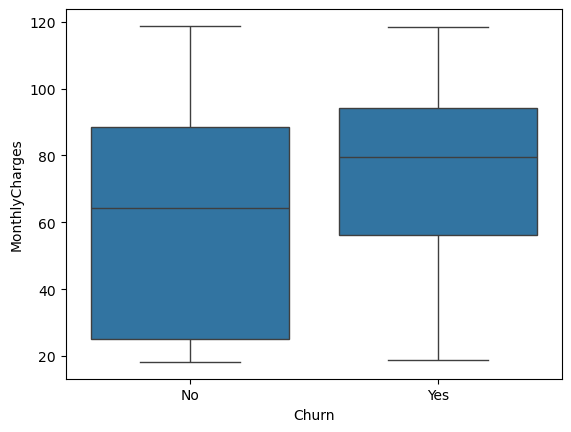

In [26]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title = ("Churn Vs MonthlyCharges")
plt.show()
# Insight - Customers with higher monthly charges are more likely to churn.

# Churn vs. Tenure

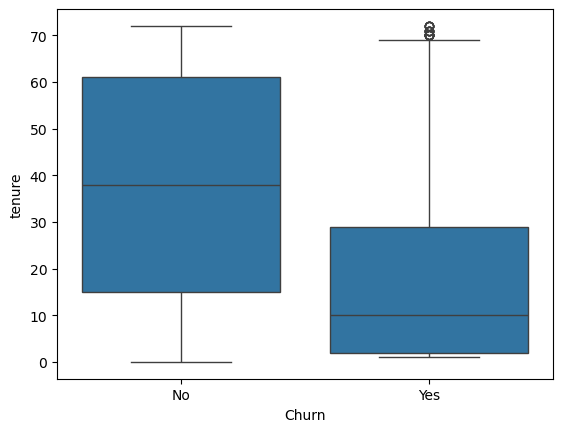

In [27]:
sns.boxplot(x="Churn", y="tenure", data=df)
plt.title = ("Churn vs Tenure")
plt.show()

# Insight - Customers with longer tenure are less likely to churn.

In [28]:
df.describe

<bound method NDFrame.describe of       customerID  tenure PhoneService        Contract PaperlessBilling  \
0     7590-VHVEG       1           No  Month-to-month              Yes   
1     5575-GNVDE      34          Yes        One year               No   
2     3668-QPYBK       2          Yes  Month-to-month              Yes   
3     7795-CFOCW      45           No        One year               No   
4     9237-HQITU       2          Yes  Month-to-month              Yes   
...          ...     ...          ...             ...              ...   
7038  6840-RESVB      24          Yes        One year              Yes   
7039  2234-XADUH      72          Yes        One year              Yes   
7040  4801-JZAZL      11           No  Month-to-month              Yes   
7041  8361-LTMKD       4          Yes  Month-to-month              Yes   
7042  3186-AJIEK      66          Yes        Two year              Yes   

                  PaymentMethod  MonthlyCharges  TotalCharges Churn  
0      

# Visualizing Customer Tenure Distribution

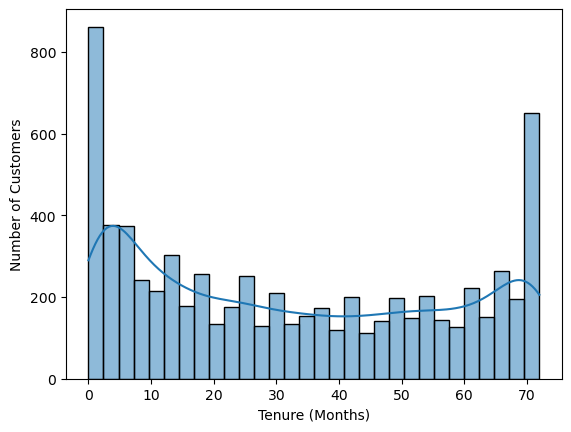

In [30]:
sns.histplot(df["tenure"], bins=30, kde=True)
plt.title = ("Customer Tenure Distribution")
plt.xlabel("Tenure (Months)")
plt.ylabel("Number of Customers")
plt.show()

# Visualizing Revenue Trends and Customer Spendings

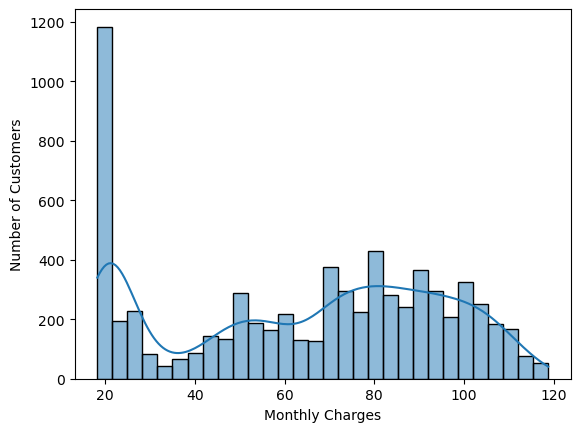

In [31]:
# Monthly Charges Distribution
sns.histplot(df["MonthlyCharges"], bins=30, kde=True)
plt.title = ("Monthly Charges Distribution")
plt.xlabel("Monthly Charges")
plt.ylabel("Number of Customers")
plt.show()

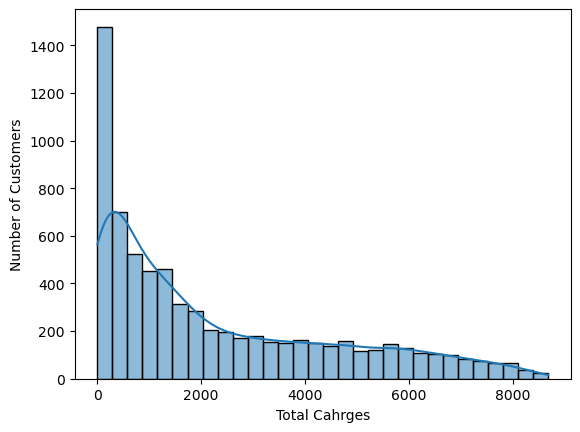

In [32]:
# Total Charges Distribution
sns.histplot(df["TotalCharges"], bins=30, kde=True)
plt.title = ("Total Charges Distribution")
plt.xlabel("Total Cahrges")
plt.ylabel("Number of Customers")
plt.show()

## Visualizing customer preferences for services, contracts, and payment methods.

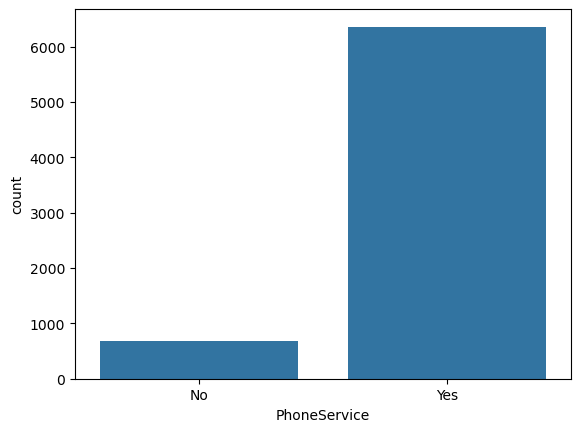

In [33]:
# PhoneService Distribution
sns.countplot(x = "PhoneService", data=df)
plt.title = ("Phone Service Adoption")
plt.show()

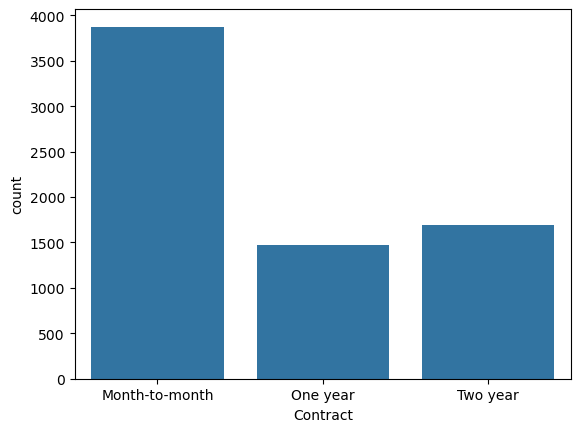

In [34]:
# Contract Distribution
sns.countplot(x = "Contract", data = df)
plt.title = ("Contract Type Distribution")
plt.show()
# Insight - Customers on long-term contracts are less likely to churn.

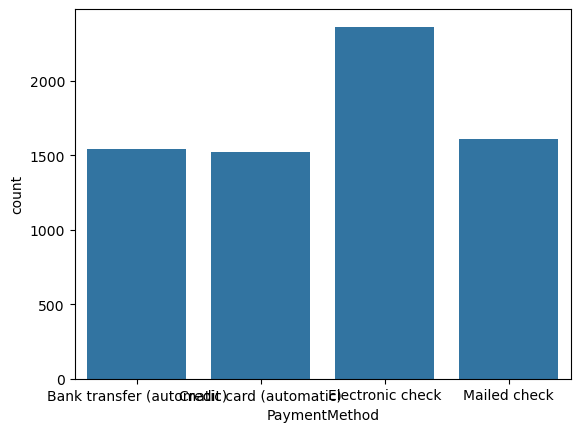

In [35]:
# PaymentMethod Distribution
sns.countplot(x = "PaymentMethod", data = df)
sns.title = ("Payment Method Distribution")
plt.show()
# Insight - Electronic check is the most popular payment method.

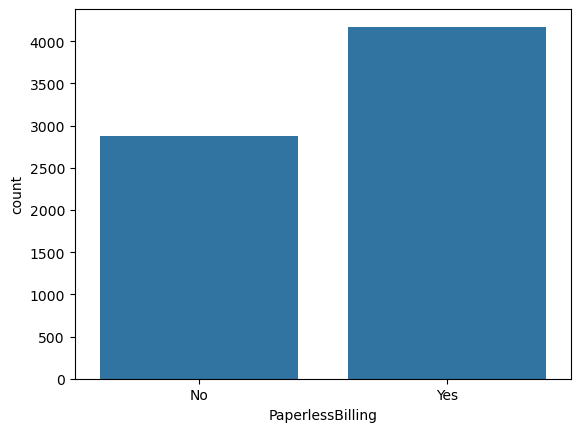

In [36]:
# PaperlessBilling distribution
sns.countplot(x = "PaperlessBilling", data = df)
plt.title = ("Paperless Billing Distribution")
plt.show()
# Insight - Customers are more towards Paperless Billing adoption.

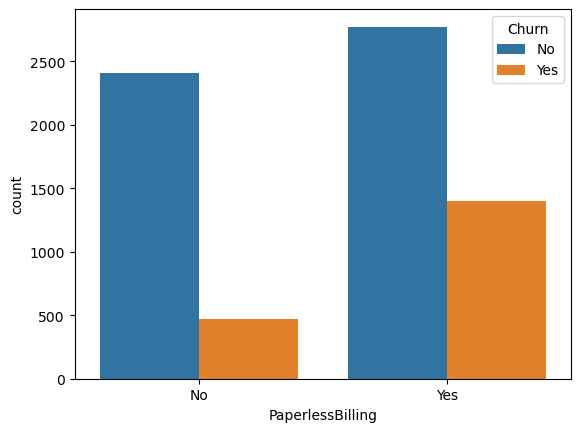

In [37]:
# PaperlessBilling vs Churn
sns.countplot(x = "PaperlessBilling", hue = "Churn", data=df)
plt.title = ("Paperless Billing vs Churn")
plt.show()
# Insight - Paperless Billing Method shows the maximum customer churn.